# **Overview**.    

The gaming industry is certainly one of the thriving industries of the modern age and one of those that are most influenced by the advancement in technology. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. In this hackathon, you as a data scientist must use your analytical skills to predict the sales of video games depending on given factors. Given are **8 distinguishing factors** that can influence the sales of a video game. Your objective as a data scientist is to build a machine learning model that can accurately predict the sales in millions of units for a given game.

**Data Description**:-
The unzipped folder will have the following files.

Train.csv –  3506 observations.     
Test.csv –  1503 observations.    
Sample Submission – Sample format for the submission.    
**Target Variable**: SalesInMillions

# File Imports

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Read the csv files
input = pd.read_csv("Train.csv")

In [ ]:
#print all columns to understand the dataset
input.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


# Data cleaning

In [ ]:
input.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

There are no null values in the dataset. So we can move to the next step of removing unnecessary columns. 

From dataset, we can observe that except `id` column, all the other columns play a significant role in final sales of videogames. So it can be dropped.

In [ ]:
input = input.drop(columns=['ID'])
train, test = train_test_split(input, test_size=0.2, random_state=42, shuffle=True)

# Descriptive Statistics

In [ ]:
train.shape, test.shape

((2804, 8), (702, 8))

In [ ]:
train.nunique()

CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           184
RATING                6
CRITICS_POINTS     1499
USER_POINTS        1877
SalesInMillions    2804
dtype: int64

From above table, my first insight is I can create bar charts of **console, year**, **category** and **ratings** columns easily. For other columns I might have to go for some other visual representation since the the number of unique values is high.

*   From **SalesInMillions** column we can see that average 
sales have been around 2 million and max sales have reached a mark of about 84 million🤩 and min sales were around just 1500😔.
*   From **year** column we can see that data covers sales from the year 1997 to 2019
*   **Critic Points** range from 0.5 to 23.25 while **user points** range from 0.0003 to 2.32. We might need to noramlise this values on same scale else critic points will have higher impact than user points on final prediction although in reality both of them should have equal importance.



# EDA

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(train, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})

In [ ]:
report.to_notebook_iframe()

In [ ]:
#Save the report in file
report.to_file("pandas_profiling_report.html")

From the above reports we can gain following insights:-   
*   Console column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439244/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.02.44_PM_nxz5cm.png" width=400>      
The sales of **PS2** were the highest in the data set

*   Years Column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439371/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.05.51_PM_ycn3nl.png" width=400>  
The sales were highest between the period **2005-2010**. 

*   Game category column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439531/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.08.40_PM_ugwpdi.png" width=400>   
  **Action** category games are most popular

Now let's compare individual columns with target(SalesInMillions) column to gain a few more insights into the data.

In [ ]:
#Sales of games that happened corresponding to each console. 
df = pd.DataFrame(train.groupby(['CONSOLE']).agg({'SalesInMillions': 'sum'}))

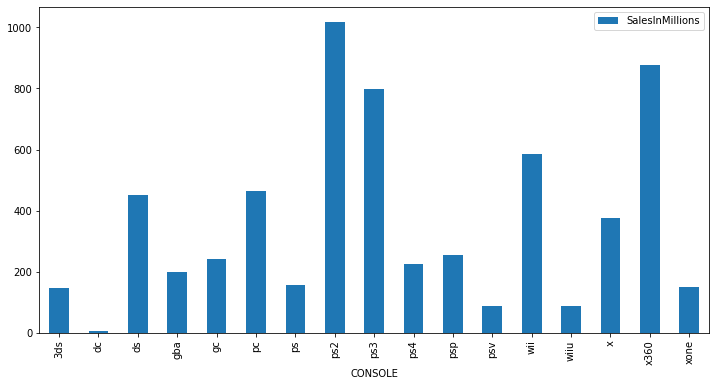

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  From the above graph we can see that sales were highest for PS3 platform followed by Xbox360

In [ ]:
df = pd.DataFrame(train.groupby(['YEAR']).agg({'SalesInMillions': 'sum'}))

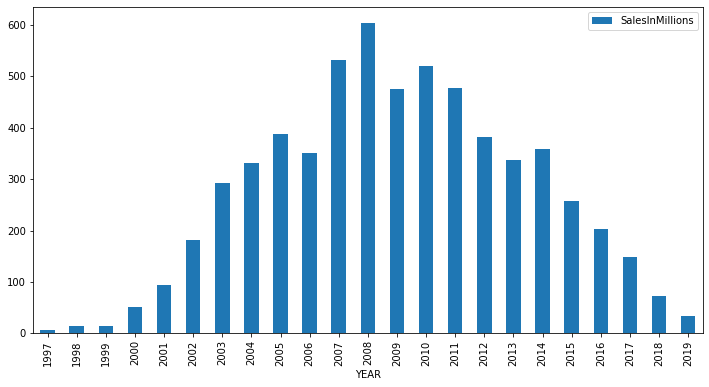

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  From the above graph we can see that sales were highest in the year 2010

In [ ]:
df = pd.DataFrame(train.groupby(['CATEGORY']).agg({'SalesInMillions': 'sum'}))

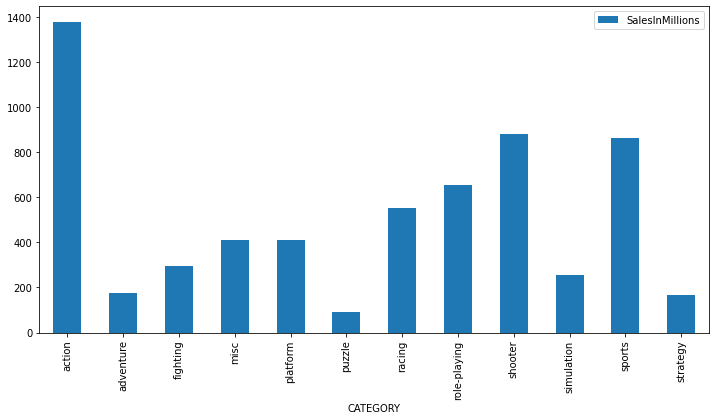

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  From the above graph we can see that sales were highest for action genre

# Model training

In [ ]:
!pip install catboost

In [ ]:
import catboost as cat
cat_feat = ['CONSOLE','CATEGORY', 'PUBLISHER', 'RATING']
features = list(set(train.columns)-set(['SalesInMillions']))
target = 'SalesInMillions'
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

# Model Accuracy

In [ ]:
y_true= pd.DataFrame(data=test[target], columns=['SalesInMillions'])
test_temp = test.drop(columns=[target])

In [ ]:
y_pred = model.predict(test_temp[features])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

1.5514154805345701


In [ ]:
import pickle
filename = 'finalized_model.sav'

In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
test_temp[features].head(1)

,CATEGORY,YEAR,USER_POINTS,CONSOLE,RATING,PUBLISHER,CRITICS_POINTS
3272,shooter,2015,0.009848,ps3,M,Take-Two Interactive,2.806452


In [ ]:
loaded_model.predict(test_temp[features].head(1))

array([2.90177037])